In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time


Using TensorFlow backend.


In [2]:
start_time = time.time()


In [3]:
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' ## to ingnore some warning 

### Load the data 

In [4]:
Corpus = pd.read_csv("input/Nausheen.csv", encoding='latin')

Corpus

,tweets,category
0,Some of the most beautiful women your eyes wil...,2
1,Of course #notall Muslims are taught all of th...,2
2,Why is JoeBiden's Director of Jewish Outreach ...,1
3,On a Muslim dating app and I asked a guy what ...,2
4,"Haha thatâs why muslim smell like shit, stop...",2
...,...,...
908,'@fjspti We are talking about Pakistan not US ...,0
909,'From US to UK Kandahar to Kabul Delhi to Mu...,0
910,'Replug: For @Reuters on how families of thos...,0
911,News in brief: #smes #UKTI #CBI #Pakistan #glo...,0


In [5]:
### The dataset has 2 class, which 0 is Email and 1 is spam 
### There are 2033 unique email out of 2087 
### There are 1356 unique spam out of 1360 

Corpus.groupby('category').describe()

tweets                                                               
          count unique                                                top freq
category                                                                      
0           417    414  Cruz introduces Senate bill to block COVID-19 ...    2
1           104    102  Ramy' becomes first Muslim American sitcom to ...    3
2           139    138  Muslims are the ones who invented the slave tr...    2
3           253    252  There can never be peace wherever there is Islam.    2

Text(0.5, 1.0, 'Number of Tweets')

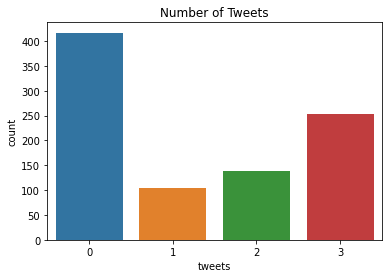

In [6]:
# Display
sns.countplot(Corpus.category)
plt.xlabel('tweets')
plt.title('Number of Tweets')

In [7]:
X = Corpus.tweets.astype(str) # data
Y = Corpus.category  # labels

In [8]:
# label enconder from pandas to an array
le = LabelEncoder()
Y = le.fit_transform(Y)

# transfor from a array to a vector
Y = Y.reshape(-1,1)

##### Splitting data 70% for training and 30% for testing

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=20)

In [10]:
X_train

652    Every vote for a Democrat is vote for taxpayer...
88     No religion claims to be the 'religion of peac...
136    Great Britain is not Great anymore, it is a sh...
802    @tedtully I've witnessed it at football matche...
611       'Nice lil reality tv show for Congress today. 
                             ...                        
218    '@Vi_Dan @TurkishTyson @muhammadtayyip @TeamKh...
223                '@ArrogantSooner ZIP IT CAMEL FUCKER 
271    '@ThePrintIndia @tdeoll Delhi residents ya red...
474    '@nipun_mudgal @iimc1999 @ShefVaidya I used to...
355    @gamenerd111 @Arkon_Khaled Lmao I hate pisslam...
Name: tweets, Length: 639, dtype: object

In [11]:
max_words = 1000
max_len = 2000
# Tokenize the data and convert the text to sequences.
tok = Tokenizer(num_words=max_words)

#Tokenize the data and convert the text to sequences.
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
# Add padding to ensure that all the sequences have the same shape.
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

# Process the test set data.
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)



### Creating Functional LSTM model

In [12]:
def LSTM_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(260)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [13]:
# Call the function and compile the model.
model = LSTM_model()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 2000)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 2000, 50)          50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 260)               323440    
_________________________________________________________________
FC1 (Dense)                  (None, 256)               66816     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

Fit on the training data.

In [ ]:
history = model.fit(sequences_matrix,
                    Y_train,
                    batch_size=256,
                    epochs=10,
                    validation_split=0.3 )

Train on 447 samples, validate on 192 samples
Epoch 1/20
447/447 [==============================] - 203s 455ms/step - loss: -0.7412 - accuracy: 0.1141 - val_loss: -1.6387 - val_accuracy: 0.0885
Epoch 2/20
447/447 [==============================] - 185s 413ms/step - loss: -2.4334 - accuracy: 0.1141 - val_loss: -2.6353 - val_accuracy: 0.0885
Epoch 3/20
447/447 [==============================] - 181s 405ms/step - loss: -3.5575 - accuracy: 0.1141 - val_loss: -3.6800 - val_accuracy: 0.0885
Epoch 4/20
447/447 [==============================] - 191s 427ms/step - loss: -5.3724 - accuracy: 0.1141 - val_loss: -4.9037 - val_accuracy: 0.0885
Epoch 5/20
447/447 [==============================] - 245s 547ms/step - loss: -6.8455 - accuracy: 0.1141 - val_loss: -6.3031 - val_accuracy: 0.0885
Epoch 6/20
447/447 [==============================] - 509s 1s/step - loss: -8.4184 - accuracy: 0.1141 - val_loss: -7.7700 - val_accuracy: 0.0885
Epoch 7/20


#### Evaluate

In [72]:
# Evaluate the model on the test set.
# Final Result - Generalization!
score = model.evaluate(test_sequences_matrix, Y_test, verbose=1) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

572/572 [==============================] - 21s 37ms/step
Test loss: 0.34646463592152493
Test accuracy: 0.9038461446762085


In [81]:
yhat = model.predict(test_sequences_matrix)

array([0.99999654], dtype=float32)

In [84]:


# the 3 lines below show how to invoke various output    
print("\n","-> Accuracy",accuracy_score(Y_test, yhat.round()))
print("\n"," -> Classification Report\n",classification_report(Y_test, yhat.round()),sep="")
print("\n","-> Classification Report\n",confusion_matrix(Y_test, yhat.round()),sep="")


 -> Accuracy 0.9178321678321678

 -> Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       312
           1       0.90      0.92      0.91       260

    accuracy                           0.92       572
   macro avg       0.92      0.92      0.92       572
weighted avg       0.92      0.92      0.92       572


-> Classification Report
[[286  26]
 [ 21 239]]


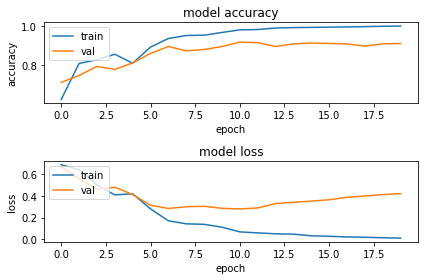

In [75]:
plt.figure(1)

# summarize history for accuracy
plt.subplot(211) 
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(212) 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout() 
plt.show()

In [29]:
print("{:.2f} seconds".format(time.time() - start_time))

966.89 seconds


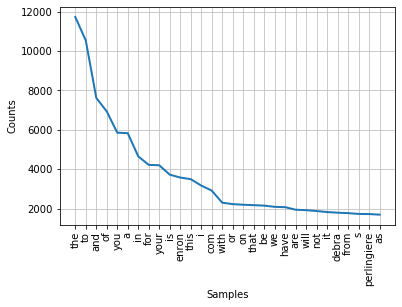

In [32]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import nltk



tokenized_word=[]
fdist = FreqDist()
for i in Corpus.email:
  
    for word in word_tokenize(i):
        fdist[word] += 1
        
fdist.plot(30,cumulative=False)
plt.show()